# Практическая работа №2: Классические методы математической статистики
Выполнила студентка гр.1375 Васильева Софья. Вариант 7


## Цель работы
Научится применять методы математической статистики для решения задач статистического анализа; сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения
**Выборочное среднее**:
$$\overline{X} = \frac{1}{n}\sum_{i=1}^{n}x_i$$

**Выборочная дисперсия и выборочное СКО** :
$$S^2 = \frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)$$
$$S = \sqrt{S^2}$$

**Выборочный коэффициент асимметрии** :
$$\widehat{\mathrm{Skew}}X = \frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i - \overline{X}\right)^3}{S^3}$$

**Выборочный коэффициент эксцесса** :
$$\widehat{\mathrm{Kurt}}X = \frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i - \overline{X}\right)^4}{S^4} - 3$$

**Метод максимального правдоподобия (ММП)**:
$$L(\overrightarrow{X},\theta) = \prod_{i=1}^{n}P_{\theta}(X_{i})$$


**Теорема Колмагорова:**

$\sqrt{n}D_n \rightarrow K$, при основной гипотезе



## Выполнение работы

### Задание-1

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as sp
from scipy.stats import expon, kstwobign,gamma
import statistics as stat
import math
import collections
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


row = [3,13, 13, 8, 8, 9, 4, 0, 0, 2, 1, 3, 0, 1, 3, 0, 3, 12, 2, 10, 4, 5, 1, 3, 0, 0, 5, 1, 2, 0, 6, 3, 0, 0, 0, 0, 1, 1, 3, 10, 10, 4, 2, 5,
3, 2, 8, 13, 5, 0] #выборка

#### a)Построить вариционный ряд, эмпирическую функцию распределения и гистограмму частот

In [73]:
sortedRow = np.sort(row)
n = len(row)
print(sortedRow)
print("Среднее выборки = ",sum(row)/ len(row))
print("Сумма выборки = ",sum(sortedRow))
# Нанесение на график вариационного ряда


[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  3
  3  3  3  3  3  3  3  4  4  4  5  5  5  5  6  8  8  8  9 10 10 10 12 13
 13 13]
Среднее выборки =  3.84
Сумма выборки =  192


Вариационный ряд:
 $\vec{X}^\prime = \left(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 8, 8, 8, 9, 10, 10, 10, 12, 13, 13, 13 \right)$ 

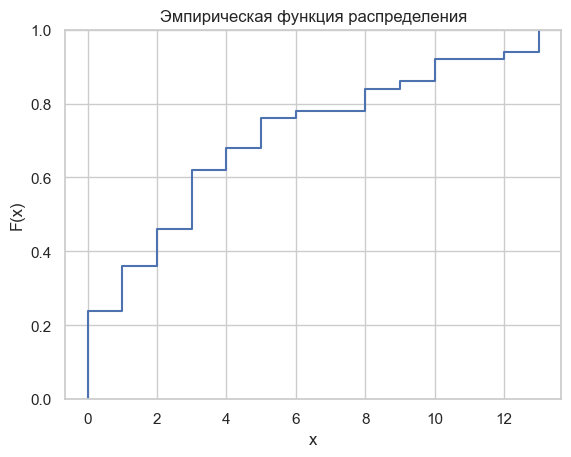

In [74]:
#n = len(row)
sns.ecdfplot(row) #построение эмпирической функции распределения

plt.title("Эмпирическая функция распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

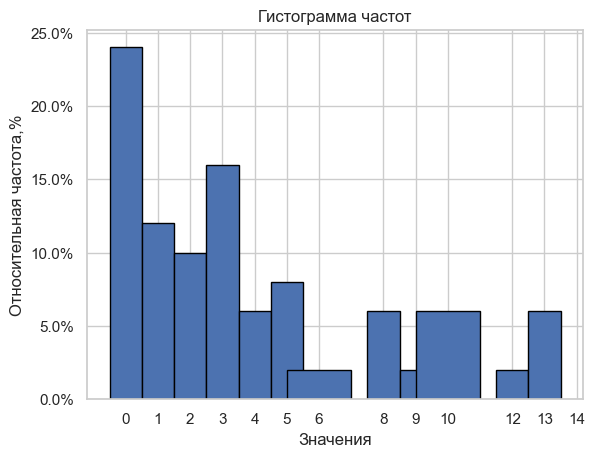

In [75]:
from matplotlib.ticker import PercentFormatter
unique_values, counts = zip(*[(value, row.count(value)) for value in sorted(set(row))])
unique_values = sorted(set(row + [max(unique_values) + 1]))
plt.hist(row, bins=unique_values, edgecolor='black', align='left', rwidth=1, color="b",  weights=[1/len(row)]*len(row))
plt.title('Гистограмма частот')
plt.xlabel('Значения')
plt.ylabel('Относительная частота,%')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(unique_values)
plt.show()

Получаем :

Мат. ожидание : $\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i= 3.84$

Дисперсия: $S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)=15.37$

СКО: $S=\sqrt{S^2}=3.92$

Медиана:$ = n\cdot\frac{1}{2} = 50\cdot\frac{1}{2}=25\in \mathbb{Z} \Rightarrow z_{50,\frac{1}{2}} =  \left[ X_{(25)},X_{(26)} \right) = \left[0,1\right) \Rightarrow z_{50,\frac{1}{2}} = 3$

Коэффициент асимметрии:$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3} = 1$

Коэффициент эксцесса: $\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3 =  -0.07$

Вероятность попадания в промежуток: $P(0≤X≤9.38) = \frac{42}{50} = 0.42 $

​
 




In [76]:
a = 1.32
b = 7.58
mean = np.mean(row)  # Выборочное математическое ожидание
variance = np.var(row)  # Дисперсия
deviation=np.std(row) #СКО
median = np.median(row)  # Медиана
skewness = stats.skew(row)  # Асимметрия
kurtosis = stats.kurtosis(row)  # Эксцесс
probability = len([x for x in row if a <= x <= b]) / len(row)  # Вероятность
print("Мат.ожидание=",mean)
print("Дисперсия=",variance)
print("Выборочное стандартное отклонение=",deviation)
print("Медиана=",median)
print("Асимметрия=",skewness)
print("Эксцесс=",kurtosis)
print("Вероятность попадания в промежуток=",probability)

Мат.ожидание= 3.84
Дисперсия= 15.374399999999998
Выборочное стандартное отклонение= 3.9210202753875167
Медиана= 3.0
Асимметрия= 1.0175914934621473
Эксцесс= -0.0748762079675589
Вероятность попадания в промежуток= 0.42


#### c)В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдободобия и оценку по методу моментов параметра $\lambda$.Найти смещение оценки.

Построим ОМП.

Плотность распределения Пуассона: $P_{\lambda}(X=k)=\frac{\lambda^{k}}{k!}\cdot exp(-\lambda)$

 Функция правдоподобия:

$L(\overrightarrow{X};\theta)=\prod_{i=1}^{n}P_{\lambda}(X_{i})=\prod_{i=1}^{n}\frac{\lambda^{X_{i}}}{X_{i}!}\cdot exp(-\lambda)=\frac{\lambda^{\sum_{i=1}^{n}X_{i}}}{\prod_{i=1}^{n}(X_{i}!)}\cdot exp(-n\cdot \lambda)$

Прологарифмируем функцию правдоподобия(в силу монотоности логарифма задача максимизации функции правдободобия сводится к задаче максимизации её логарифма по всем $\theta \in \Theta$):

$LL(\overrightarrow{X};\theta)= \sum_{i=1}^{n}X_{i}\cdot \ln(\lambda)-\ln(\prod_{i=1}^{n}X_{i}!)-n\cdot \lambda$

Найдем частную производную по параметру $\lambda$ и приравняем к нулю:

$\frac{\partial LL(\overrightarrow{X};\theta)}{\partial \lambda} = \frac{\sum_{i=1}^{n}X_{i}}{\lambda}-n=0\to \frac{\sum_{i=1}^{n}X_{i}}{\lambda}=n\to \lambda=\frac{1}{n}\cdot \sum_{i=1}^{n}X_{i}\to \widehat{\theta}=\widehat{\lambda}=\overline{X}$.

Параметр:$\widehat{\lambda}=\overline{X}=3.84$

Тогда  $\widehat{\theta}=\widetilde{\lambda}=\overline{X}=3.84$ - ОМП

Построим по ОММ.
Для закона Пуассона $P_{\lambda}(X=k)=\frac{\lambda^{k}}{k!}\cdot exp(-\lambda)$

Первый момент $\mathbb{E}X_{1}=\lambda;M_{1}=\overline{X}$
равен нашему параметру, и поскольку у нас одномерный параметр, то у нас будет система из одного уравнения.



Для нахождения НРМД-оценки нам понадобится  мат. ожидание от ОМП.

$g\left(T(\overrightarrow{X})\right)=\lambda^{\sum_{i=1}^{n}X_{i}}\cdot exp(-n\cdot \lambda)$

$h(\overrightarrow{X})=\frac{1}{\prod_{i=1}^{n}X_{i}!}$

 $T=\sum_{i=1}^{n}X_{i}=192$ - МДС

Распределение Пуассона принадлежит экспоненциальному семейству распределения, следовательно, МДС будет являться ПДС.

$\mathbb{E}{\widehat{\theta}} = \mathbb{E}\overline{X}=\mathbb{E}\frac{1}{n}\cdot \sum_{i=1}^{n}x_{i}=\frac{1}{n}\cdot \mathbb{E}\sum_{i=1}^{n}x_{i}=\frac{1}{n}\cdot \sum_{i=1}^{n}\mathbb{E}X_{1}=\frac{1}{n}\cdot n\cdot \mathbb{E}X_{1}=\lambda=3.84$

$\mathbb{\widetilde{\theta}} = 3.84$-НРМД-оценка



#### d) Построение асимптотического доверительного интервала уровня значимости $\alpha_1$ для параметра $\lambda$ на основе функции максимального правдоподобия.

$\alpha_1 = 0.02$

1. **Построение на основе оценки максимального правдоподобия (ОМП):**

    $\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$
   

    Используем оценку максимального правдоподобия (ОМП) для параметра $\lambda$, обозначенную как $\widehat{\lambda}$, которая равна среднему значению выборки $\overline{X} = 3.84$.  Асимптотический доверительный интервал строится вокруг этой точечной оценки.

    Информация Фишера для нашего параметра $\lambda$ вычисляется как $I(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left( -\frac{\sum_{i=1}^{n}X_{i}}{\lambda^{2}} \right)=\frac{n}{\lambda^{2}}$.

    Тогда $\sqrt{n\cdot I\left(  \widehat{\theta}(\overrightarrow{X})\right)}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,1)$

    Выбор $X_{\alpha}$: $\mathrm{Ф}(X_{\alpha})=1-\frac{\alpha_{1}}{2}=1-\frac{0.02}{2}=0.99 \to X_{0.9}=2.32$

    *Асимптотический доверительный интервал:*

    $\left[\overline{X} - \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha}\right] \ni \lambda$

    Таким образом, АДИ уровня значимости $\alpha_1$ для параметра $\lambda$:
    $\left[3.2, 4.48\right] \ni \lambda$

2. **Построение на основе асимптотической нормальной оценки $\widehat{\theta}$:**

   Альтернативный метод построения доверительного интервала. Мы можем использовать асимптотическую нормальную оценку для $\widehat{\theta}$, которая дает нам  общий вид доверительного интервала.

    $\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,\sigma^{2}(\theta))$

    $\sqrt{n}\frac{ \widehat{\theta}(\overrightarrow{X})-\theta}{\sigma(\widehat{\theta})}\sim N(0,1)$

    $X_{\alpha}: \mathrm{Ф(X_{\alpha})}=0.99\to X_{0.99}=2.32$

    $-X_{0.99}\le \sqrt{n}\cdot \frac{\widehat{\lambda}-\lambda}{\sqrt{\widehat{\lambda}}}\le X_{0.99}$

    $3.84-\frac{2.32\cdot 3.84}{\sqrt{50}}\le \lambda\le 3.84+\frac{2.32\cdot 3.84}{\sqrt{50}}$

    $ \lambda \in \left[3.2,4.48\right]$ - Асимптотический доверительный интервал на основе ОМП с доверительной точностью 0.99

In [77]:
from math import sqrt

n = len(row)
xAlpha = stats.norm.ppf(0.99)

Ex = 3.84
lambda_min = Ex - xAlpha/sqrt(n/Ex)
lambda_max = Ex + xAlpha/sqrt(n/Ex)
print(xAlpha)
print("Асимптотический доверительный интервал на базе ОМП:λ от ",round(lambda_min,2), " до ", round(lambda_max,2),"с доверительной точностью", 0.99 )

2.3263478740408408
Асимптотический доверительный интервал на базе ОМП:λ от  3.2  до  4.48 с доверительной точностью 0.99


### е) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_0 = 6$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.02$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.



$\lambda_0 = 6 \:\alpha_1=0.02$  
$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\frac{\lambda_{0}^{k}}{k!}exp(-\lambda_{0})$


**Объединяем малочисленные частоты у которых n<5:**

1. Определение категорий и частот:
   
   $   I_1 = \left(-\infty,0 \right], \quad n_1 = 12 $

   $   I_2 = \left(0,1 \right], \quad n_2 = 6 $

   $   I_3 = \left(1,2 \right], \quad n_3 = 5 $

   $   I_4 = \left(2,3 \right], \quad n_4 = 8 $

   $   I_5 = \left(3,5 \right], \quad n_5 = 7 $

   $   I_6 = \left(5,9 \right], \quad n_6 = 5 $

   $   I_7 = \left(9,13 \right], \quad n_7 = 7 $
   

2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

   $\mathbb{P}_{1} =  \frac{4^{0}}{0!}exp(-4) = 0.0025$

      $\mathbb{P}_{2} = \sum \limits_{k=0}^1 \large \frac{4^{k}}{k!}exp(-4)- \frac{4^0}{0!}e^{-4} = 0.0149 $

      $\mathbb{P}_{3} =  0.0446$

      $\mathbb{P}_{4} =  0.0892 $

      $\mathbb{P}_{5} = 0.2945$

      $\mathbb{P}_{6} = 0.4704 $
      
      $\mathbb{P}_{7} = 0.0803$




3. Вычисление статистики критерия $\chi^2$:

   $\chi^2 = \sum \limits_{i=1}^7 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 1192.3$

4. Сравнение с критическим значением:
   1) Из таблицы для распределения $\chi^2$ с 7 степенями свободы при уровне значимости $\alpha = 0.02$ значение критерия составляет $\chi_{7, 0.02}^2 \approx 15.03$.
   2) Так как $\chi^2 > \chi_{7, 0.02}^2$, мы отвергаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
    Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 1, исходя из таблицы значений $\chi^2$.



In [78]:
lam0=6
I = [(-math.inf,0), (0,1),(1,2),(2,3),(3,5),(5,9),(9,13)]

n_i = [12,6, 5, 8,7,5,7] ;p_i = [] ;np_i = [] ; n_i_np_i = [] ; res = [] ; csi = []
for i in I:
 p_i.append(round(sp.poisson.cdf(i[1], lam0) - sp.poisson.cdf(i[0], lam0), 4))
print("теоретические вероятности:" ,p_i)
for i in range (len(I)):
 np_i.append(round(n*p_i[i], 4))
#print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print("xsi^2", sum(res))
print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.02, df=7-1))
print('p-value = ', 1 - stats.chi2.cdf(stats.chi2.ppf(1 - 0.02, df=7-1), 7))
print("zz=", 1-sp.chi2.cdf(sum(csi),7))

теоретические вероятности: [0.0025, 0.0149, 0.0446, 0.0892, 0.2945, 0.4704, 0.0803]
xsi^2 1192.2975000000001
x_alpha_1 равен: 15.033207751218962
p-value =  0.03557607823653397
zz= 1.0


#### f)Построить критерий значимости  $\mathcal{X^{2}}$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу по уровню значимости $\alpha_{1}$.Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$\widehat{\theta}=\overline{X}=3.84  \quad \alpha_1=0.02$ 

$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\frac{\overline{X}^{k}}{k!}exp(-\overline{X})$



1. Определение категорий и частот:
   
   $   I_1 = \left(-\infty,0 \right], \quad n_1 = 12 $

   $   I_2 = \left(0,1 \right], \quad n_2 = 6 $

   $   I_3 = \left(1,2 \right], \quad n_3 = 5 $

   $   I_4 = \left(2,3 \right], \quad n_4 = 8 $

   $   I_5 = \left(3,5 \right], \quad n_5 = 7 $

   $   I_6 = \left(5,9 \right], \quad n_6 = 5 $

   $   I_7 = \left(9,13 \right], \quad n_7 = 7 $
   

2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

   $\mathbb{P}_{1} =  \frac{3.84^{0}}{0!}exp(-3.84) = 0.0215$

      $\mathbb{P}_{2} = \sum \limits_{k=0}^1 \large \frac{3.84^{k}}{k!}exp(-3.84)- \frac{3.84^0}{0!}exp(-3.84) = 0.0825 $

      $\mathbb{P}_{3} = 0.1585$

      $\mathbb{P}_{4} = 0.2028 $

      $\mathbb{P}_{5} =0.3443 $

      $\mathbb{P}_{6} =0.1842 $
      
      $\mathbb{P}_{7} = 0.0062$




3. Вычисление статистики критерия $\chi^2$:

   $\chi^2 = \sum \limits_{i=1}^3 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 2384.3$

4. Сравнение с критическим значением:
   1) Из таблицы для распределения $\chi^2$ с 7 степенями свободы при уровне значимости $\alpha = 0.02$ значение критерия составляет $\chi_{7, 0.02}^2 \approx 15.03$.
   2) Так как $\chi^2 > \chi_{7, 0.2}^2$, мы отвергаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
   - Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 1, исходя из таблицы значений $\chi^2$.





In [79]:
p_i =[]
for i in I:
 p_i.append(round(sp.poisson.cdf(i[1], Ex) - sp.poisson.cdf(i[0], Ex), 4))
print("теоретические вероятности:" ,p_i)
for i in range (len(I)):
 np_i.append(round(n*p_i[i], 4))
#print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print("xsi^2", sum(res))
print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.02, df=7-1))
print('p-value = ', 1 - stats.chi2.cdf(stats.chi2.ppf(1 - 0.02, df=7-1), 7))
    

теоретические вероятности: [0.0215, 0.0825, 0.1585, 0.2028, 0.3443, 0.1842, 0.0062]
xsi^2 2384.5950000000003
x_alpha_1 равен: 15.033207751218962
p-value =  0.03557607823653397


### 1.g Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром $\lambda = \lambda_0 = 6$ при альтернативе пуассоновости с параметром $\lambda = \lambda_1 = 4$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.02$. Что получится, если поменять местами основную и альтернативную гипотезы?



$ H_{0}:\lambda = \lambda_{0}$

$ H_{1}:\lambda = \lambda_{1}$


Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0}) = \frac{L\left( \overrightarrow{X},\lambda_{1} \right)}{L\left( \overrightarrow{X},\lambda_{0} \right)}= \frac{\lambda_{1}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{1})}{\lambda_{0}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{0})} = \left(\frac{\lambda_{1}}{\lambda_{0}}\right)^{\sum_{i=1}^{50}X_{i}} \cdot exp(-n\cdot \lambda_{1} + n\cdot \lambda_{0} )$

Критерий для принятия альтернативной гипотезы:

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) > c\Leftrightarrow \overline{X}> c$

Нормализованная статистика:

$\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}\sim N(0,1)$

Уровень значимости:

$\alpha = 0.02$

$P\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)\gt \sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}=1-\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)=\alpha_{1}$

$\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)=1-\alpha_{1}=0.98$

$\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}\gt \sqrt{n}\frac{c-\lambda_{0}}{\sqrt{\overline{X}}} = 0.42$

$c=\frac{0.42 \cdot \sqrt{\overline{X}}}{ \sqrt{n}} + \lambda_{0}  = 6 + \frac{0.42 \cdot \sqrt{3.84}}{ \sqrt{50}} = 6.11$

$ \overline{X} < c \to $  Отвергаем гипотезу

**Поменяем местами основную и альтернативную гипотезу:**

$H_{0}=\lambda_{1}$

$H_{1}=\lambda_{0}$

Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) = \frac{L\left( \overrightarrow{X},\lambda_{0} \right)}{L\left( \overrightarrow{X},\lambda_{1} \right)}= \frac{\lambda_{0}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{0})}{\lambda_{1}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{1})} = \left(\frac{\lambda_{0}}{\lambda_{1}}\right)^{\sum_{i=1}^{50}X_{i}} \cdot e^{-n\cdot \lambda_{0} + n\cdot \lambda_{1} }$

Критерий для принятия альтернативной гипотезы:

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})\gt c\Leftrightarrow \overline{X}\gt c$

Нормализованная статистика:

$\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}\sim N(0,1)$

$P\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)\gt \sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}=1-\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)=\alpha_{1}$

Уровень значимости:

$\alpha = 0.02$

$\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)=1-\alpha_{1}=0.98$

$\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}\gt \sqrt{n}\frac{c-\lambda_{1}}{\sqrt{\overline{X}}} = 0.42$

$c=\frac{0.42 \cdot \sqrt{\overline{X}}}{ \sqrt{n}} + \lambda_{1}  = 4 + \frac{0.42 \cdot \sqrt{3,84}}{ \sqrt{50}} = 4.11 $

$ c > \overline{X} \to $  Отвергаем гипотезу


In [80]:
xAlpha = stats.norm.ppf(0.98)
print(xAlpha)

c1 = 6 +((0.42*sqrt(3.84))/sqrt(50))
c2 = 4 +((0.42*sqrt(3.84))/sqrt(50))

print("основная гипотеза = λ0 = 6:",c1)
print("основная гипотеза = λ1 = 4:",c2)

2.0537489106318225
основная гипотеза = λ0 = 6: 6.116393814268629
основная гипотеза = λ1 = 4: 4.116393814268629


### 1.h В пунктах (c) - (f) заменить семейство распределений Пуассона на семейство геометрических распределений:
$$\mathbb{P}_{\lambda}\left(X = k\right) = \frac{\lambda^k}{(\lambda + 1)^{k+1}}, k \in \mathbb{Z}_+$$

#### h.c)В предположении, что исходные наблюдения являются выборкой из геометрического распределения, построить ОМП и ОММ параметра $\lambda$.Найти смещение оценки.



$\mathbb{P}_{\lambda}\left(X = k\right) = \frac{\lambda^k}{(\lambda + 1)^{k+1}} $



**Оценка максимального правдоподобия:**

$L(\overrightarrow{X};\theta)=\prod_{i=1}^{n}P_{\lambda}(X_{i})=\prod_{i=1}^{n}\frac{\lambda^{X_{i}}}{(\lambda+1)^{X_{i}}}=\frac{\lambda^{\sum_{i=1}^{n}X_{i}}}{(\lambda+1)^{\sum_{i=1}^{n}X_{i}+n}}$


$ L(\vec{X}, \theta) = \small \displaystyle \prod_{i = 1}^{n} \frac{\large \lambda^{X_i}}{(\lambda + 1)^{X_i + 1}}  = \frac{\large \lambda^{n \bar{X}}}{(\lambda + 1)^{n \bar{X} + n}}$ 

Прологарифмируем функцию правдоподобия(в силу монотоности логарифма задача максимизации функции правдободобия сводится к задаче максимизации её логарифма по всем $\theta \in \Theta$):

$ LL(\vec{X}, \theta) = n \bar{X} \ ln \lambda - \left( n \bar{X} + n \right) ln (\lambda + 1) $ 

$ \frac{\large \partial LL(\vec{X}, \theta)}{\large \partial \lambda} =  \frac{\large n \bar{X}}{\large \lambda} - \frac{\large n \bar{X} + n}{\lambda + 1} = 0 \implies \hat{\lambda} = \bar{X} = 3.84$ 

\
\
**Расчёт ОММ**

$ EX_1 = \lambda $\
$ M_1 = \bar{X} $ \
$ \hat{\lambda} = \bar{X} = 3.84$\
\
\
**Посчитаем смещещение оценок.**

$ E \hat{\lambda} = E \bar{X} = \frac{1}{n} E \displaystyle \sum_{i=1}^{n}{X_i} = \frac{1}{n} \displaystyle \sum_{i=1}^{n} E {X_i} = \frac{1}{n} \displaystyle \sum_{i=1}^{n} \lambda  = \frac{\lambda n}{n} = \lambda $\
 Тогда полученные оценки являются несмещёнными.



#### h.d)Построить асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе ОМП

$ \widehat{\theta} = 3.84 \quad a_1 = 0.02 $ - ОМП

 **На основе ОМП.** 
 
$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$


информация Фишера: $I(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left( -\frac{\sum_{i=1}^{n}X_{i}}{\lambda^{2}}+\frac{\sum_{i=1}^{n}X_{i}+n}{(\lambda +1)^{2}} \right)=\frac{n}{\lambda^{2}}-\mathbb{E}\left( \frac{\sum_{i=1}^{n}X_{i}+n}{(\lambda+1)^{2}} \right) = \frac{n}{\lambda^{2}}-\mathbb{E}\left( \frac{\sum_{i=1}^{n}X_{i}}{(\lambda+1)^{2}} \right)-\mathbb{E}\left( \frac{n}{(\lambda+1)^{2}} \right)=\frac{n}{\lambda^{2}}-\frac{n}{(\lambda+1)^{2}}-\frac{n}{(\lambda+1)^{2}}=\frac{n(\lambda^{2}+1)}{(\lambda+1)^{2}\cdot \lambda^{2}}$

Тогда $\sqrt{n\cdot I\left(  \widehat{\theta}(\overrightarrow{X})\right)}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,1)$

Выбираем $X_{\alpha}$: $\mathrm{Ф}(X_{\alpha})=1-\frac{\alpha_{1}}{2}=1-\frac{0.02}{2}=0.99 $

$ X_{0.99}=2.32$

$А.Д.И. \left[ \overline{X}-\frac{X_{0.99}}{\sqrt{n\cdot \frac{n({\bar{X}^{2}}+1)}{({\bar{X}}+1)^{2}\cdot {\bar{X}^{2}}}}};{\overline{X}}+\frac{X_{0.99}}{\sqrt{n\cdot \frac{n({\bar{X}^{2}}+1)}{({\bar{X}}+1)^{2}\cdot {\bar{X}^{2}}}}} \right]$

$\lambda \in [2.99, 4.69]$

$2.99\le \lambda\le 4.69$ - Асимп. довер. интервал параметра $\lambda$.


In [81]:
xAlpha = stats.norm.ppf(0.99)
adi_2 = []
E = 3.84
SKO = 3.92
left_border = E - (xAlpha * SKO / math.sqrt(n*n*(E**2+1)/((E+1)**2*(E**2))))
right_border = E + (xAlpha * SKO / math.sqrt(n*n*(E**2+1)/((E+1)**2*(E**2))))
adi_2.append(round(left_border, 2))
adi_2.append(round(right_border, 2))
print("Асимптотический доверительный интервал: ", adi_2)

Асимптотический доверительный интервал:  [2.99, 4.69]


#### h.e)Используя гистограмму частот, построить критерий значимости $\mathcal{X^{2}}$ проверки простой гипотезы согласия с геометрическим распределением с параметром $\lambda_{0}$. Проверить гипотезу на урокень значимости $\alpha_{1}$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$\lambda_0 = 6  \quad \alpha_1=0.02$ 

$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\frac{\lambda_{0}^{k}}{(\lambda_{0}+1)^{k+1}}$



1. Определение категорий и частот:
   
   $   I_1 = \left(-\infty,0 \right], \quad n_1 = 12 $

   $   I_2 = \left(0,1 \right], \quad n_2 = 6 $

   $   I_3 = \left(1,2 \right], \quad n_3 = 5 $

   $   I_4 = \left(2,3 \right], \quad n_4 = 8 $

   $   I_5 = \left(3,5 \right], \quad n_5 = 7 $

   $   I_6 = \left(5,9 \right], \quad n_6 = 5 $

   $   I_7 = \left(9,13 \right], \quad n_7 = 87 $
   

2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

   $\mathbb{P}_{1} =  \frac{4^{0}}{(4+1)^{0+1}} = 0.14$

      $\mathbb{P}_{2} = \sum \limits_{k=0}^1 \large \frac{4^{k}}{(4+1)^{k+1}} - \frac{4^{0}}{(4+1)^{0+1}} = 0.12 $

      $\mathbb{P}_{3} = 0.105 $

      $\mathbb{P}_{4} = 0.09 $

      $\mathbb{P}_{5} = 0.143$

      $\mathbb{P}_{6} = 0.182$
      
      $\mathbb{P}_{7} =0.098 $




3. Вычисление статистики критерия $\chi^2$:

   $\chi^2 = \sum \limits_{i=1}^7 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 8.78$

4. Сравнение с критическим значением:
   1) Из таблицы для распределения $\chi^2$ с 7 степенями свободы при уровне значимости $\alpha = 0.02$ значение критерия составляет $\chi_{7, 0.02}^2 \approx 15.03$.
   2) Так как $\chi_{7, 0.02}^2 > \chi^2 $, мы принимаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
    Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 1, исходя из таблицы значений $\chi^2$.



In [82]:
def geom(x, lambd):
 res_g = 0
 for i in range(0, x + 1):
     res_g += (lambd**i)/((lambd+1)**(i+1))
 return res_g
lam0=6
I = [(-math.inf,0), (0,1),(1,2),(2,3),(3,5),(5,9),(9,13)]
n_i = [12,6, 5, 8,7,5,7] ;p_i = [] ;np_i = [] ; n_i_np_i = [] ; res = []
n_inter = len(I) - 1
p_i.append(geom(0, lam0))
for i in range(1, len(n_i)):
 p_i.append(round(geom(I[i][1], lam0) - geom(I[i][0], lam0), 4))
print("теоретические вероятности:",p_i)
for i in range(len(n_i)):
 np_i.append(round(p_i[i]*n, 4))
#print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print("xsi^2", sum(res))
print(1 - sp.chi2.cdf(sum(res), 4))

print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.02, df=n_inter))
print('p-value = ', 1 - stats.chi2.cdf(stats.chi2.ppf(1 - 0.02, df=n_inter),n_inter)) 

теоретические вероятности: [0.14285714285714285, 0.1224, 0.105, 0.09, 0.1432, 0.1825, 0.0985]
xsi^2 8.781799999999999
0.06679095223902065
x_alpha_1 равен: 15.033207751218962
p-value =  0.020000000000000018


#### h.f)Построить критерий значимости  $\mathcal{X^{2}}$ проверки сложной гипотезы согласия с геометрическим распределением. Проверить гипотезу по уровню значимости $\alpha_{1}$.Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$\widehat{\theta}=\overline{X}=3.84  \quad \alpha_1=0.02$ 

$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\frac{\overline{X}^{k}}{\left( \overline{X} +1\right)^{k+1}}$



1. Определение категорий и частот:
   
   $   I_1 = \left(-\infty,0 \right], \quad n_1 = 12 $

   $   I_2 = \left(0,1 \right], \quad n_2 = 6 $

   $   I_3 = \left(1,2 \right], \quad n_3 = 5 $

   $   I_4 = \left(2,3 \right], \quad n_4 = 8 $

   $   I_5 = \left(3,5 \right], \quad n_5 = 7 $

   $   I_6 = \left(5,9 \right], \quad n_6 = 5 $

   $   I_7 = \left(9,13 \right], \quad n_7 = 7 $
   

2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

   $\mathbb{P}_{1} =  \frac{5.14^{0}}{(5.14+1)^{0+1}} = 0.14$

      $\mathbb{P}_{2} = \sum \limits_{k=0}^1 \large \frac{5.14^{k}}{(5.14+1)^{k+1}} - \frac{5.14^{0}}{(5.14+1)^{0+1}} = 0.164 $

      $\mathbb{P}_{3} = 0.13$

      $\mathbb{P}_{4} =0.103 $

      $\mathbb{P}_{5} = 0.147$

      $\mathbb{P}_{6} = 0.151$
      
      $\mathbb{P}_{7} =0.0597 $




3. Вычисление статистики критерия $\chi^2$:

   $\chi^2 = \sum \limits_{i=1}^3 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 12.06$

4. Сравнение с критическим значением:
   1) Из таблицы для распределения $\chi^2$ с 7 степенями свободы при уровне значимости $\alpha = 0.02$ значение критерия составляет $\chi_{7, 0.02}^2 \approx 15.03$.
   2) Так как $\chi_{7, 0.02}^2 > \chi^2 $, мы принимаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
    Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 1 исходя из таблицы значений $\chi^2$.



In [83]:
p_i = [] ;np_i = [] ; n_i_np_i = [] ; res = []

p_i.append(geom(0, lam0))
for i in range(1, len(n_i)):
 p_i.append(round(geom(I[i][1], Ex) - geom(I[i][0], Ex), 4))
print("теоретические вероятности:",p_i)
for i in range(len(n_i)):
 np_i.append(round(p_i[i]*n, 4))
#print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print("xsi^2", sum(res))


print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.02, df=n_inter))
print('p-value = ', 1 - stats.chi2.cdf(stats.chi2.ppf(1 - 0.02, df=n_inter),n_inter)) 


теоретические вероятности: [0.14285714285714285, 0.1639, 0.1301, 0.1032, 0.1468, 0.1506, 0.0597]
xsi^2 12.068200000000001
x_alpha_1 равен: 15.033207751218962
p-value =  0.020000000000000018


### Задание-2

#### a)Построить вариционный ряд, эмпирическую функцию распределения,гистограмму и полигон частот с шагом h = 0.20.

In [85]:
data2 = [0.054, 0.400, 0.881, 0.043, 0.318, 0.551, 0.198, 0.049, 0.000, 0.292, 1.962, 0.009, 0.938, 0.010, 0.287, 0.848, 0.410, 0.129, 0.000, 0.000, 0.625,
0.033, 0.006, 0.167, 0.605, 0.428, 0.517, 0.264, 0.097, 1.278, 0.467, 3.652, 0.069, 0.067, 0.017, 0.065, 1.671, 0.288, 0.038, 1.653, 1.446, 0.037,
0.685, 0.180, 0.271, 1.764, 0.027, 0.098, 0.254, 0.367]
n = len(data2)
#вариационный ряд
data2.sort()


print( "Вариационный ряд:", data2)

Вариационный ряд: [0.0, 0.0, 0.0, 0.006, 0.009, 0.01, 0.017, 0.027, 0.033, 0.037, 0.038, 0.043, 0.049, 0.054, 0.065, 0.067, 0.069, 0.097, 0.098, 0.129, 0.167, 0.18, 0.198, 0.254, 0.264, 0.271, 0.287, 0.288, 0.292, 0.318, 0.367, 0.4, 0.41, 0.428, 0.467, 0.517, 0.551, 0.605, 0.625, 0.685, 0.848, 0.881, 0.938, 1.278, 1.446, 1.653, 1.671, 1.764, 1.962, 3.652]


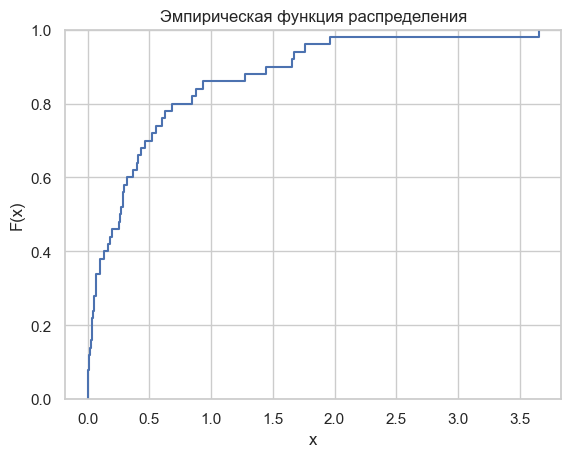

In [86]:
sns.ecdfplot(data2) #построение эмпирической функции распределения

plt.title("Эмпирическая функция распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

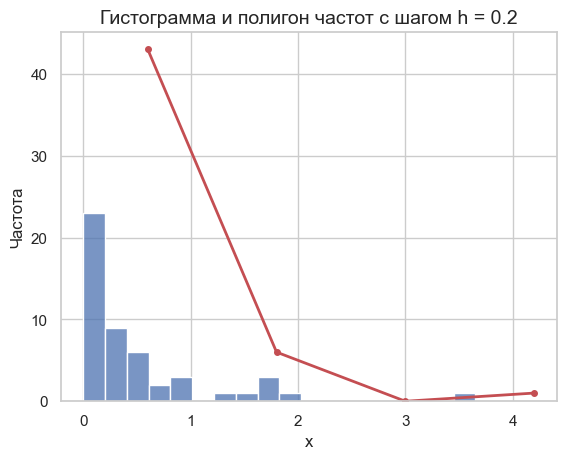

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data2 = [0.054, 0.400, 0.881, 0.043, 0.318, 0.551, 0.198, 0.049, 0.000, 0.292, 1.962, 0.009, 0.938, 0.010, 0.287, 0.848, 0.410, 0.129, 0.000, 0.000, 0.625,
0.033, 0.006, 0.167, 0.605, 0.428, 0.517, 0.264, 0.097, 1.278, 0.467, 3.652, 0.069, 0.067, 0.017, 0.065, 1.671, 0.288, 0.038, 1.653, 1.446, 0.037,
0.685, 0.180, 0.271, 1.764, 0.027, 0.098, 0.254, 0.367]


sns.set(style="whitegrid")


sns.histplot(x=data2, binwidth=0.2, color='b')

bins = np.arange(min(data2), max(data2) + 1.2, 1.2)


hist, _ = np.histogram(data2, bins=bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bin_centers, hist, '-r', marker='.', linewidth=2, markersize=8)


plt.title("Гистограмма и полигон частот с шагом h = 0.2", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("Частота", fontsize=12)


plt.show()


#### b) Вычислить выборочные аналоги следующих числовых характеристик: (i)математическое ожидание, (ii)дисперсия, (iii)медианы, (iv)асимметрии, (v)эксцесса (vi) вероятности $\mathrm{P}(X\in \left[ a,b \right])$

Получаем  выборочные аналоги:

Мат. ожидание : $\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i=0.49 $

Дисперсия: $S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)= 0.46$

СКО: $S=\sqrt{S^2}=0.68$

Медиана:$ = n\cdot\frac{1}{2} = 50\cdot\frac{1}{2}=25\in \mathbb{Z} \Rightarrow z_{50,\frac{1}{2}} =  \left[ X_{(25)},X_{(26)} \right) = \left[0,1\right) \Rightarrow z_{50,\frac{1}{2}} = 0.267$

Коэффициент асимметрии:$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3} = 2.50$
Коэффициент эксцесса: $\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3 =  7.44$

Вероятность попадания в промежуток: $P(0≤X≤4) = \frac{44}{50} = 0.84 $

In [90]:
c = 0.00
d = 0.92
mean = np.mean(data2)  # Выборочное математическое ожидание
variance = np.var(data2)  # Дисперсия
deviation=np.std(data2) #СКО
median = np.median(data2)  # Медиана
skewness = stats.skew(data2)  # Асимметрия
kurtosis = stats.kurtosis(data2)  # Эксцесс
probability = len([x for x in data2 if c <= x <= d]) / len(data2)  # Вероятность
print("Мат.ожидание=",mean)
print("Дисперсия=",variance)
print("Выборочное стандартное отклонение=",deviation)
print("Медиана=",median)
print("Асимметрия=",skewness)
print("Эксцесс=",kurtosis)
print("Вероятность попадания в промежуток=",probability)

Мат.ожидание= 0.4903
Дисперсия= 0.46567209000000004
Выборочное стандартное отклонение= 0.6824017072077121
Медиана= 0.2675
Асимметрия= 2.495967667706016
Эксцесс= 7.4402006731402714
Вероятность попадания в промежуток= 0.84


#### c)В предположении, что исходные наблюдения являются выборкой из показательного распределения, построить ОМП и ОММ параметра $\lambda$.Найти смещение оценки.

Плотность показательного распределения:

$f(x; \lambda) =
\begin{cases}
\lambda \cdot exp(-\lambda x), & \text{если } x \geq 0 \\
0, & \text{если } x < 0
\end{cases}$

Для данной выборки это событие достоверное и всегда выполняется, индикатором у плотности распределения можно не пиать



$P(X)=\lambda\cdot exp(-\lambda X)$

Функция правдоподобия:

$L(\overrightarrow{X},\theta)= \prod_{i=1}^{n}P(x_i) = \prod_{i=1}^{n}\lambda\cdot exp(-\lambda\cdot X_{i})=\lambda^{n}\cdot exp(-\lambda\cdot \sum_{i=1}^{n}X_{i})$

Прологарифмируем функцию правдоподобия(в силу монотоности логарифма задача максимизации функции правдободобия сводится к задаче максимизации её логарифма по всем $\theta \in \Theta$):

$LL(\overrightarrow{X},\theta)=n\ln(\lambda)-\lambda\cdot \sum_{i=1}^{n}X_{i}$

$ \frac{\partial LL}{\partial \lambda} = \frac{n}{\lambda} - \sum \limits_{i=1}^{n}x_i = 0$

$ \widehat{\theta} = \widehat{\lambda} = \frac{1}{\overline{X}} = 2.04$ - ОМП

**Расчёт ОММ**

$\mathbb{E}(X_1)=a$
$M_1=\bar{x}=\cfrac{1}{n}\sum_{i=1}^nx_i = 2.04$

**Оценки совпали.Найдём смещение**

$g\left(T(\overrightarrow{X})\right)=\lambda\cdot exp(-\lambda X)$

$h(\overrightarrow{X})=1$

$T=\sum_{i=1}^{n}X_{i}$.- МДС

Показательное распределение принадлежит экспоненциальному семейству распределения $\Rightarrow$ МДС = ПДС.

$ \mathbb{E}_{\theta}\widehat{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta} n\cdot \sum \limits_{i=1}^{n}\frac{1}{x_i} = n (\frac1{λ})^{-1} \frac{Г(-1+n)}{Г(n)}=\frac{nλ}{n-1} =n \cdot\frac{1}{n-1} \cdot \lambda = \frac{n\cdot\lambda}{n-1} \Rightarrow$ смещённая оценка.

$\mathbb{E}_{\lambda}\widetilde{\lambda}=\mathbb{E}_{\lambda}\widehat{\lambda}\frac{n-1}{n}=\frac{n-1}{n}\mathbb{E}_{\lambda}\widehat{\lambda}=\frac{n-1}{n}\cdot \frac{n\cdot \lambda}{n-1}=\lambda$-НРМД-оценка

$\widetilde{\theta} = \widetilde{\lambda} = \frac{1}{\overline{X}}$ -НРМД оценка

#### d)Построить А.Д.И. уровня значимости $\alpha_2$ для параметра $\lambda$ на базе ОМП

$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,\sigma^{2}(\theta))$

$\sqrt{n}\frac{ \widehat{\theta}(\overrightarrow{X})-\theta}{\sigma(\widehat{\theta})}\sim N(0,1)$

$ x_{α}: Ф(x_{α})=1-\frac{α}2=1-\frac{0.01}2=0.995 $

$ Ф(2.57)=0,995 $

$x_{α}=2.57$



$X_{\alpha}: \mathrm{Ф(X_{\alpha})}=0.995\to X_{0.99}=2.6$

$-X_{0.995}\le \sqrt{n}\cdot \frac{\widehat{\lambda}-\lambda}{\sqrt{\widehat{\lambda}}}\le X_{0.995}$

$2.04-\frac{2.57\cdot 0.487}{\sqrt{50}}\le \lambda\le 2.04+\frac{2.57\cdot 2.04}{\sqrt{50}}$


$\lambda \in [1.3;2.78]$ - Асимптотический доверительный интерввал параметра $\lambda$

In [92]:
xAlpha = stats.norm.ppf(0.995)
print("xalpa = ", xAlpha)
E = 2.04
left_border = E - ((xAlpha*E)/sqrt(50))
right_border = E + ((xAlpha*E)/sqrt(50))
adi_2 = []
adi_2.append(round(left_border, 2))
adi_2.append(round(right_border, 2))
print("Асимптотический доверительный интервал: ", adi_2)

xalpa =  2.5758293035489004
Асимптотический доверительный интервал:  [1.3, 2.78]


#### e) С использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия с показательным распределением с параметрами $ (\lambda_0 = 0.33) $. Проверить гипотезу на уровне значимости $ a_2 = 0.05 $. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Основаня гипотеза $ H_0 : X_1...X_n \sim \mathcal{N}(\alpha_0, \sigma_0^2) $\
Альтернативная гипотеза $ H_А : X_1...X_n$ не распределена, как $\mathcal{N}(\alpha_0, \sigma_0^2) $

Статистика критерия Колмогорова $ \widehat{D_n} = max| F_n(x) - Ф_{(\alpha_0, \sigma_0^2)}(x) | $. Построим критерий Колмогорова.\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq x_\alpha \\ 1, \quad \widehat{D_n} > x_\alpha \end{cases}$, где $ x_\alpha: \mathcal{K_n}(x_\alpha) = 1 - \alpha_2 = 0.95 $


Критерий Колмогорова\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq 0.17 \\ 1, \quad \widehat{D_n} > 0.17 \end{cases}$

In [95]:
import scipy


lambda0 = 1.43
alpha_2 = 0.01
D = np.max(np.abs(expon.cdf(data2, scale=1/lambda0) - np.arange(1, n+1 / n)))
critical_value = kstwobign.ppf(1 - 0.2/2) / np.sqrt(n)
print("Вычисленное значение статистики Колмогорова D:",D)

print("xa = ",critical_value)
print("Наибольший уровень значимости без отвергания гипотезы:", 1 - scipy.stats.chi2.cdf(D,4))


Вычисленное значение статистики Колмогорова D: 49.59166777056429
xa =  0.17307822563424255
Наибольший уровень значимости без отвергания гипотезы: 4.393956309911573e-10


Т.к. $\widehat{D_n} > x_\alpha$, гипотеза $H_0$ отвергается.


#### f)Используя гистограмму частот, построить критерий значимости $\mathcal{X^{2}}$ проверки простой гипотезы согласия с показательным распределением с параметром $\lambda_{0}$. Проверить гипотезу на урокень значимости $\alpha_{2}$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\lambda_{0}\cdot exp(-\lambda_{0}\cdot k)$



1. Определение категорий и частот:

$ I_1 = \left(0,0.005 \right], \quad n_1 = 13 $

$ I_2 = \left(0.005,0.2 \right], \quad n_2 = 10 $

$ I_3 = \left(0.2,0.5 \right], \quad n_3 = 12 $

$ I_4 = \left(0.5,1 \right], \quad n_4 = 8 $

$ I_5 = \left(1,+\infty \right], \quad n_4 = 7$



2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

$\mathbb{P}_{1} = \sum \limits_{k=0}^1 \large 1.43 \cdot exp(-1.43 \cdot k) - 1.43 \cdot exp(-1.43 \cdot 0) = 0.34$

$\mathbb{P}_{2} = 0.082$

$\mathbb{P}_{3} = 0.019$

$\mathbb{P}_{4} = 0.005 $

$\mathbb{P}_{5} = -0.88 $

3. Вычисление статистики критерия $\chi^2$:

$\chi^2 = \sum \limits_{i=1}^5 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i} \normalsize = 330.96$

4. Сравнение с критическим значением:
- Из таблицы для распределения $\chi^2$ с 5 степенями свободы при уровне значимости $\alpha = 0.01$ значение критерия составляет $\chi_{4, 0.01}^2 \approx 16.8$.
- Так как $\chi_{4, 0.05}^2 < \chi^2 $, мы отвергаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
- Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 0.000001, исходя из таблицы значений $\chi^2$.


In [99]:
import math

def pok(x, lambd):
    res_g = 0
    if math.isinf(x): 
        return 1.0 
    for i in range(0, int(x) + 1):
        res_g += (lambd) * math.exp(-lambd * i)
    return res_g
p_i = [] ;np_i = [] ; n_i_np_i = [] ; res = []
xsi = 0
lam0 = 1.43
I = [(0, 0.005), (0.005, 0.2), (0.2, 0.5), (0.5, 1), (1, math.inf)]
n_i = [13, 10, 12, 8, 7]
p_i = []



p_i.append(round(pok(1, lam0) - pok(0, lam0), 4))
p_i.append(round(pok(2, lam0) - pok(1, lam0), 4))
p_i.append(round(pok(3, lam0) - pok(2, lam0), 4))
p_i.append(round(pok(4, lam0) - pok(3, lam0), 4))
p_i.append(round(pok(math.inf, lam0) - pok(4, lam0), 4))


print("Теоретические вероятности:", p_i)
for i in range(len(n_i)):
    np_i.append(round(p_i[i]*n, 100))

for i in range(len(n_i)):
    n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
    res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print("xsi^2", sum(res))

print('p-value = ',1 - sp.chi2.cdf(sum(res), 5))
print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.01, df=n_inter))


Теоретические вероятности: [0.3422, 0.0819, 0.0196, 0.0047, -0.8784]
xsi^2 330.96079999999995
p-value =  0.0
x_alpha_1 равен: 16.811893829770927


#### g)Построить критерий значимости $\mathcal{X^{2}}$ проверки сложной гипотезы согласия с показательным распределением. Проверить гипотезу по уровню значимости $\alpha_{2}$.Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\frac{1}{\overline{X}}\cdot exp(-\frac{1}{\overline{X}}\cdot k)$

**Объединяем малочисленные частоты у которых n<5:**

1. Определение категорий и частот:

$ I_1 = \left(0,0.005 \right], \quad n_1 = 13 $

$ I_2 = \left(0.005,0.2 \right], \quad n_2 = 10 $

$ I_3 = \left(0.2,0.5 \right], \quad n_3 = 12 $

$ I_4 = \left(0.5,1 \right], \quad n_4 = 8 $

$ I_5 = \left(1,+\infty \right], \quad n_4 = 7$



2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

$\mathbb{P}_{1} = \sum \limits_{k=0}^1 \large 2.04 \cdot exp(-2.04 \cdot k) - 2.04 \cdot exp(-2.04 \cdot 0) = 0.3422$

$\mathbb{P}_{2} =  0.082$

$\mathbb{P}_{3} = 0.0196$

$\mathbb{P}_{4} = 0.0047$

$\mathbb{P}_{5} =0.8784 $





3. Вычисление статистики критерия $\chi^2$:

$\chi^2 = \sum \limits_{i=1}^5 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i} \normalsize = 421.03$

4. Сравнение с критическим значением:
- Из таблицы для распределения $\chi^2$ с 5 степенями свободы при уровне значимости $\alpha = 0.01$ значение критерия составляет $\chi_{5, 0.01}^2 \approx 15.03$.
- Так как $\chi_{5, 0.01}^2 < \chi^2 $, мы отрицаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
- Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 0.000001, исходя из таблицы значений $\chi^2$.

In [102]:
p_i = [] ;np_i = [] ; n_i_np_i = [] ; res = []
xsi = 0
lam0 = 1.43
I = [(0, 0.005), (0.005, 0.2), (0.2, 0.5), (0.5, 1), (1, math.inf)]
n_i = [13, 10, 12, 8, 7]
p_i = []

p_i.append(round(pok(1, lam0) - pok(0, lam0), 4))
p_i.append(round(pok(2, lam0) - pok(1, lam0), 4))
p_i.append(round(pok(3, lam0) - pok(2, lam0), 4))
p_i.append(round(pok(4, lam0) - pok(3, lam0), 4))
p_i.append(abs(round(pok(math.inf, lam0) - pok(4, lam0), 4)))

print("Теоретические вероятности:", p_i)
for i in range(len(n_i)):
    np_i.append(round(p_i[i]*n, 100))

for i in range(len(n_i)):
    n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
    res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print("xsi^2", sum(res))

print('p-value = ',1 - sp.chi2.cdf(sum(res), 5))
print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.02, df=n_inter))

Теоретические вероятности: [0.3422, 0.0819, 0.0196, 0.0047, 0.8784]
xsi^2 421.0322
p-value =  0.0
x_alpha_1 равен: 15.033207751218962


### 2.h Построить наиболее мощный критерий проверки простой гипотезы показательности с параметром $\lambda_0 = 1,43$ при альтернативе показательности с параметром $\lambda_1 = 0.48$. Проверить гипотезу на уровне значимости $\alpha_2 = 0.01$. Что получится, если поменять местами основную и альтернативную гипотезы?

сновная гипотеза: $H_{0}=\lambda_{0}=1,43$

Альтернативная гипотеза: $H_{A}=\lambda_{1}=0.48$


Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0}) = \left(\frac{\lambda_{1}}{\lambda_{0}}\right)^n \cdot e^{-\lambda_{1} \cdot {\sum_{i=1}^{50}X_{i}} + \lambda_{0} \cdot {\sum_{i=1}^{50}X_{i}} }$

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})> c\Leftrightarrow \overline{X} < c^*$

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})< c\Leftrightarrow \overline{X} > c^*$

$e^{{\sum_{i=1}^{50}X_{i}}\cdot (-\lambda_{1} + \lambda_{0})}=\left(\frac{\lambda_{0}}{\lambda_{1}}\right)^n c$

Логарифмируем:

(1) $c* = {\sum_{i=1}^{50}X_{i}}=n \cdot ln\left(\left(\frac{\lambda_{0}}{\lambda_{1}}\right) c\right)$

$\sum_{i=1}^{50}X_{i}\sim \Gamma \left(n,\frac{1}{\lambda}\right)$

$1-\Phi_{\Gamma \left(n,\frac{1}{\lambda}\right)}(c)=\alpha_{2}$

$ c = \Phi^{-1}_{\Gamma \left(n,\frac{1}{\lambda}\right)}(1-\alpha_{2})$

$ c = 43.5$

Найдем с* подставив значени в выражение (1):

$ с* = 243.2$

$LR(\overrightarrow{X}, \lambda_{0}, \lambda_{1}) =  2.3348$



$c > LR \to$ принимаем гипотезу

In [115]:
lambda_1 =0.48
lambda_0 = 1.43
c1 = sp.gamma.ppf(0.95, a =50, scale = (1/lambda_0))
print('c =', c1)
cSt1 = 50*np.log(lambda_0/lambda_1*c1)
print('c* = ',cSt1)
LR1 = ((lambda_0/lambda_1)**50)*math.exp(lambda_1*cSt1 - lambda_0*cSt1)
print('LR =', LR1,'\n')

c = 43.47626342797346
c* =  243.19293700965326
LR = 2.3348390723275797e-77 



**Меняем местами основную и альтернативную гипотезу:**

$H_{0}=\lambda_{1}$

$H_{1}=\lambda_{0}$

Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) = \left(\frac{\lambda_{0}}{\lambda_{1}}\right)^n \cdot exp^{-\lambda_{0} \cdot {\sum_{i=1}^{50}X_{i}} + \lambda_{1} \cdot {\sum_{i=1}^{50}X_{i}} }$

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1})> c\Leftrightarrow \overline{X} < c^*$

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1})< c\Leftrightarrow \overline{X} > c^*$

${exp}^{{\sum_{i=1}^{50}X_{i}}\cdot (-\lambda_{0} + \lambda_{1})}=\left(\frac{\lambda_{1}}{\lambda_{0}}\right)^n c$

$ c = \Phi^{-1}_{\Gamma \left(n,\frac{1}{\lambda}\right)}(1-\alpha_{2})$

$ c = 129.5$

$ с* = 297.77$


$LR(\overrightarrow{X}, \lambda_{0}, \lambda_{1}) = 1.41$



$ c > LR \to $ отвергаем гипотезу

In [116]:
c2 = sp.gamma.ppf(0.95, a =50, scale=1/lambda_1)
print('c =', c2)
cSt2 = 50*np.log(lambda_0/lambda_1*c2)
print('c* = ',cSt2)
LR2 = ((lambda_1/lambda_0)**50)*np.exp(lambda_0*cSt2 - lambda_1*cSt2)
print('LR =', LR2)

c = 129.5230347958376
c* =  297.77511797725407
LR = 1.4165961327476743e+99


## Вывод

В процессе выполнения данной лабораторной работы мы освоили ; оценка максимального правдоподобия (ОМП) и оценка метода моментов (ОММ), построение доверительных интервалов,асимптотические доверительные интервалы, критерий Колмогорова, критерии Хи^2 для проверки гипотез о распределении данных,принципы построения наиболее мощного критерия для простых гипотез